# Diabetes Patients Predictive Analysis

**Project Overview:**

This project focuses on predictive analysis for diabetes diagnosis using a dataset originally sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset contains various medical and demographic variables for a group of Pima Indian heritage females who are at least 21 years old.

The primary objective of this project is to develop a predictive model that can diagnostically predict whether a patient has diabetes based on the provided diagnostic measurements and demographic information.

**Dataset Description:**

| Features                 | Description                                             |
|--------------------------|---------------------------------------------------------|
| *Pregnancies*            | The number of pregnancies a patient has had.          |
| *Glucose*                | Plasma glucose concentration, an indicator of blood sugar levels. |
| *BloodPressure*          | Diastolic blood pressure.                               |
| *SkinThickness*          | Skinfold thickness, which may be related to body composition. |
| *Insulin*                | 2-Hour serum insulin level.                             |
| *BMI*                    | A measure of body weight and height, indicating body fat. |
| *DiabetesPedigreeFunction* | A measure of the diabetes heredity risk based on family history. |
| *Age*                    | The age of the patient in years.                        |
| *Outcome*                | The target variable indicating whether the patient has diabetes (1 for positive, 0 for negative). |


# Importing Important Libraries For This Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
#Spliting Data into Train and Test:
from sklearn.model_selection import train_test_split
#For Feature Scaling:
from sklearn.preprocessing import StandardScaler
#Support Vector Machine:
from sklearn.svm import SVC
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Evaluation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#For ignoring  warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Dataset
data = pd.read_csv("/content/diabetes.csv")

In [4]:
#Copy the dataset
df = data.copy()

# Data Exploration

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Number of Rows and  Columns in Dataset

In [7]:
df.shape
print("Total Number of Rows in Dataset  :",data.shape[0])
print("Total Number of Columns in Dataset:",data.shape[1])

Total Number of Rows in Dataset  : 768
Total Number of Columns in Dataset: 9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# <font color=navy>**Overall Statistics About The Dataset**</font>

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color=red>Data Summary Report</font>**

| Features                 | Description                                             |
|--------------------------|---------------------------------------------------------|
| **Pregnancies**         | Most data falls within the range of 1 to 6 pregnancies.          |
| **Glucose**             | Glucose levels are typically distributed between 99 to 140. |
| **BloodPressure**       | Most values fall within the 62 to 80 range.                               |
| **SkinThickness**       | A significant portion of the data has values between 0 and 32. |
| **Insulin**             | A substantial portion of the data has low insulin values.                             |
| **BMI**                 | Most values fall in the range of 27.3 to 36.6. |
| **DiabetesPedigreeFunction** | The majority of values are below 0.626. |
| **Age**                 | Most of the data represents individuals between the ages of 24 and 41.                        |
| **Outcome**             | The dataset appears to be imbalanced, with a lower number of positive outcomes (diabetes) compared to negative outcomes (no diabetes). |


# Checking Outliers

In [10]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box_traces = []

# Iterate through each column and create a box plot
for column in df.columns:
    if column != 'Outcome':  # Exclude 'Outcome' if it's the target variable
        trace = go.Box(y=df[column], name=column)
        box_traces.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box_traces, layout=layout)

# Show the figure
fig.show()


## Outliers have been identified in our dataset.

# <font color=red>**Managing Outliers in Dataset**</font>

In [11]:
#Create a function to handle Outliers
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(lower=lower_limit, upper=upper_limit)
    return data

In [12]:
#Handle outliers using "remove_outliers" function

df = remove_outliers(df, 'Pregnancies')
df = remove_outliers(df, 'Glucose')
df = remove_outliers(df, 'BloodPressure')
df = remove_outliers(df, 'SkinThickness')
df = remove_outliers(df, 'Insulin')
df = remove_outliers(df, 'BMI')

In [13]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box_traces = []

for column in df.columns:
    if column != 'Outcome':  # Exclude 'Outcome' if it's the target variable
        trace = go.Box(y=df[column], name=column)
        box_traces.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box_traces, layout=layout)

# Show the figure
fig.show()


<font color=red>**After handling outliers , the datatype of some columns has changed to float. We also need to convert them back to int32.**</font>

In [14]:
df['Pregnancies']=round(df['Pregnancies'].astype('int32'))
df['Glucose']=round(df['Glucose'].astype('int32'))
df['Insulin']=round(df['Insulin'].astype('int32'))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 45.1 KB


# Visualizing the Dataset for Better Understanding:

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

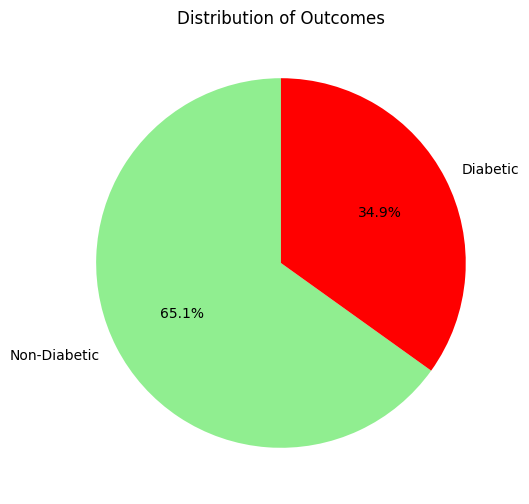

In [20]:
# Count the occurrences of each outcome value
outcome_counts = df['Outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'red'])
plt.title('Distribution of Outcomes')
plt.show()


### <font color=Blue>**Converting Numerical Features into Categorical Features  for Data Clarity:**</font>

### Create bins for the 'Pregnancies' column

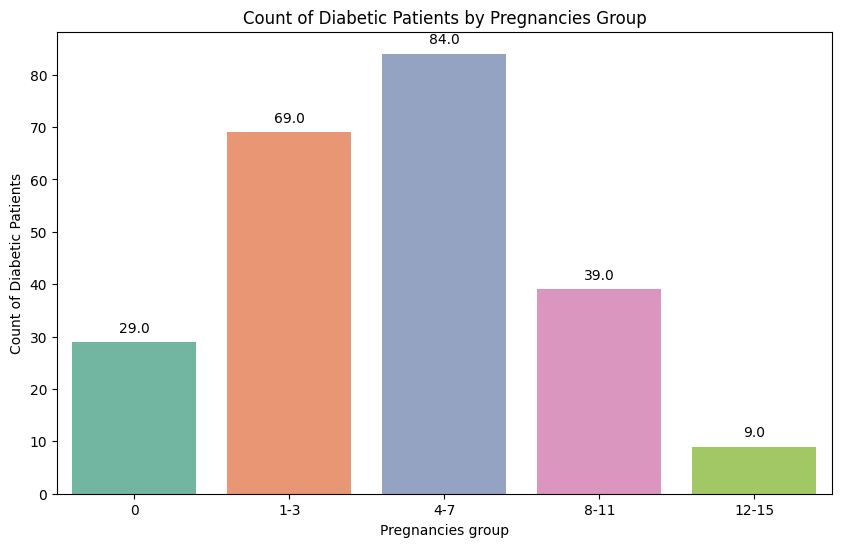

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, pregnancies_bins, pregnancies_labels, and diabetic_df are defined
pregnancies_bins = [0, 1, 4, 8, 12, 16]
pregnancies_labels = ['0', '1-3', '4-7', '8-11', '12-15']

# Create 'PregnanciesGroup' column
df['PregnanciesGroup'] = pd.cut(df['Pregnancies'], bins=pregnancies_bins, labels=pregnancies_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'PregnanciesGroup' as the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diabetic_df, x='PregnanciesGroup', order=pregnancies_labels, palette="Set2")
plt.xlabel('Pregnancies group')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Pregnancies Group')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



### Create age groups based on the 'Age' column

In [24]:
bins = [20, 30, 40, 50, 60, 70, 80, 200]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

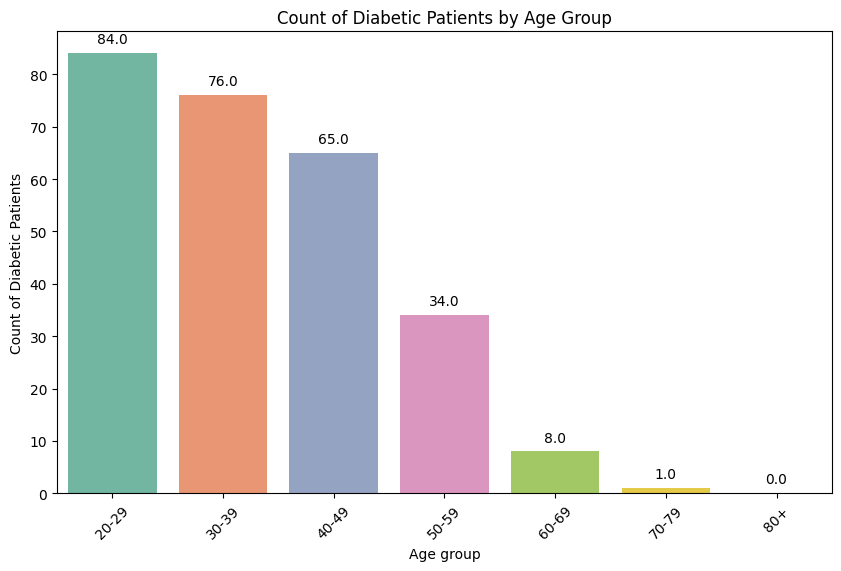

In [25]:
# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with age groups
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diabetic_df, x='AgeGroup', order=labels, palette="Set2")
plt.xlabel('Age group')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Age Group')
plt.xticks(rotation=45)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


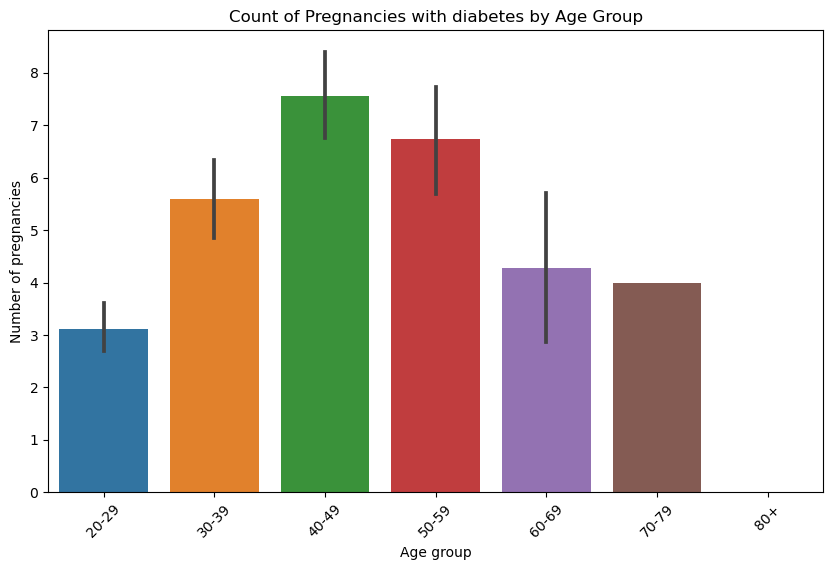

In [ ]:
new_df = df[(df['Outcome'] == 1) & (df['Pregnancies'] > 0)]
# Create a bar chart with 'Outcome' as hue
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=new_df, x='AgeGroup', y='Pregnancies')
plt.xlabel('Age group')
plt.ylabel('Number of pregnancies')
plt.title('Count of Pregnancies with diabetes by Age Group')
plt.xticks(rotation=45)


plt.show()


### Define the bins and labels for 'BloodPressure'

In [27]:
# Define the bins and labels for 'BloodPressure'
blood_pressure_bins = [0, 80, 89, 99, 119, 1000]  # Adjust the boundaries as needed
blood_pressure_labels = ['Low', 'Normal', 'Prehypertension', 'Stage 1 hypertension', 'Stage 2 hypertension']

# Create a new column 'BloodPressureCategory' based on the bins and labels
df['BloodPressureCategory'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=blood_pressure_labels,right=False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnanciesGroup,AgeGroup,BloodPressureCategory
0,6,148,72,35,0,33.6,0.627,50,1,4-7,50-59,Low
1,1,85,66,29,0,26.6,0.351,31,0,0,30-39,Low
2,8,183,64,0,0,23.3,0.672,32,1,4-7,30-39,Low
3,1,89,66,23,94,28.1,0.167,21,0,0,20-29,Low
4,0,137,40,35,168,43.1,2.288,33,1,NaN,30-39,Low


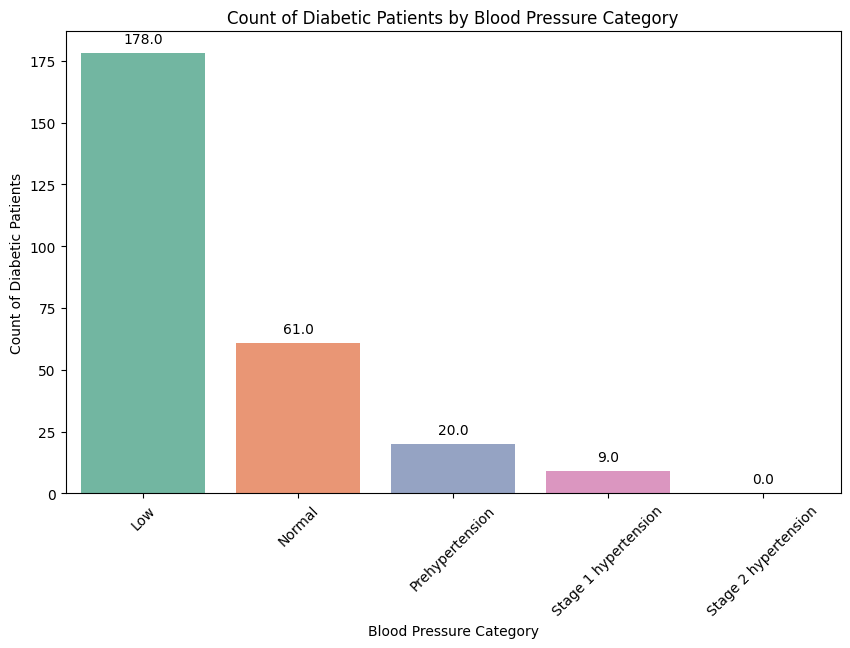

In [28]:
# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'BloodPressureCategory' as the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diabetic_df, x='BloodPressureCategory', order=blood_pressure_labels, palette="Set2")
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Blood Pressure Category')
plt.xticks(rotation=45)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



### Define the bins and labels for 'SkinThickness'

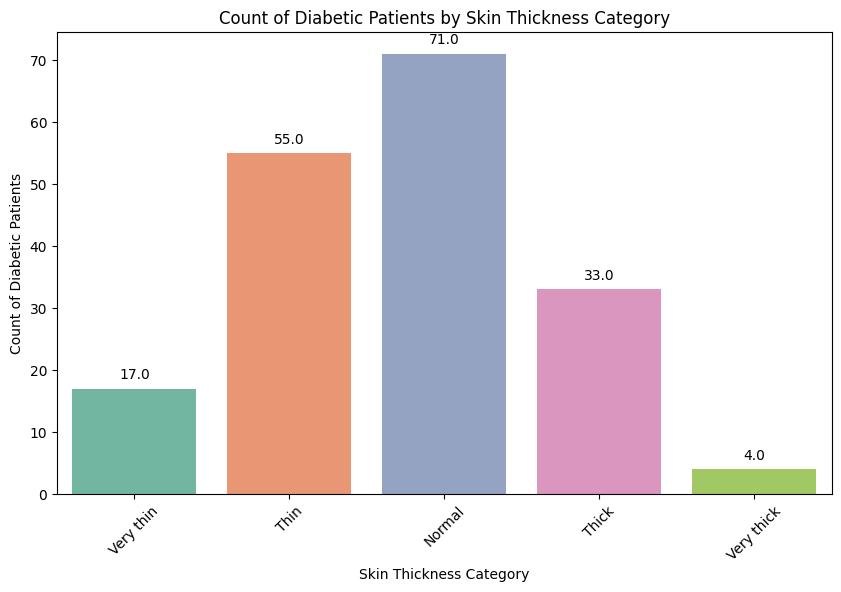

In [31]:

skin_thickness_bins = [0, 20, 30, 40, 50, 100]
skin_thickness_labels = ['Very thin', 'Thin', 'Normal', 'Thick', 'Very thick']

# Create a new column 'SkinThicknessCategory' based on the bins and labels
df['SkinThicknessCategory'] = pd.cut(df['SkinThickness'], bins=skin_thickness_bins, labels=skin_thickness_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'SkinThicknessCategory' as the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diabetic_df, x='SkinThicknessCategory', order=skin_thickness_labels, palette="Set2")
plt.xlabel('Skin Thickness Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Skin Thickness Category')
plt.xticks(rotation=45)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Define the custom bins and labels for 'BMI'

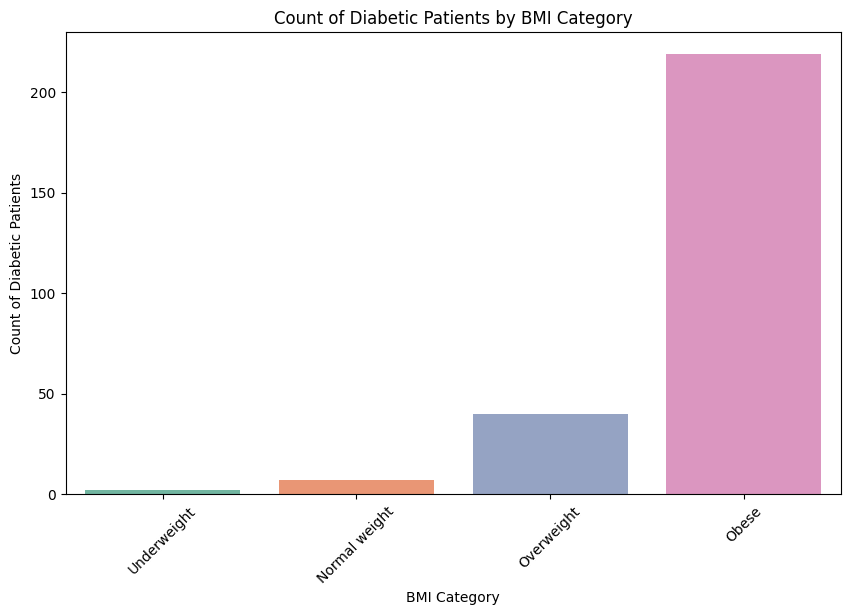

In [32]:
# Define the custom bins and labels for 'BMI'
bmi_bins = [0, 18.5, 24.9, 29.9, 1000]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Create a new column 'BMICategory' based on the custom bins and labels
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'BMICategory' as the x-axis
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='BMICategory', order=bmi_labels, palette="Set2")
plt.xlabel('BMI Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by BMI Category')
plt.xticks(rotation=45)
plt.show()


### Define the custom bins and labels for 'Insulin'

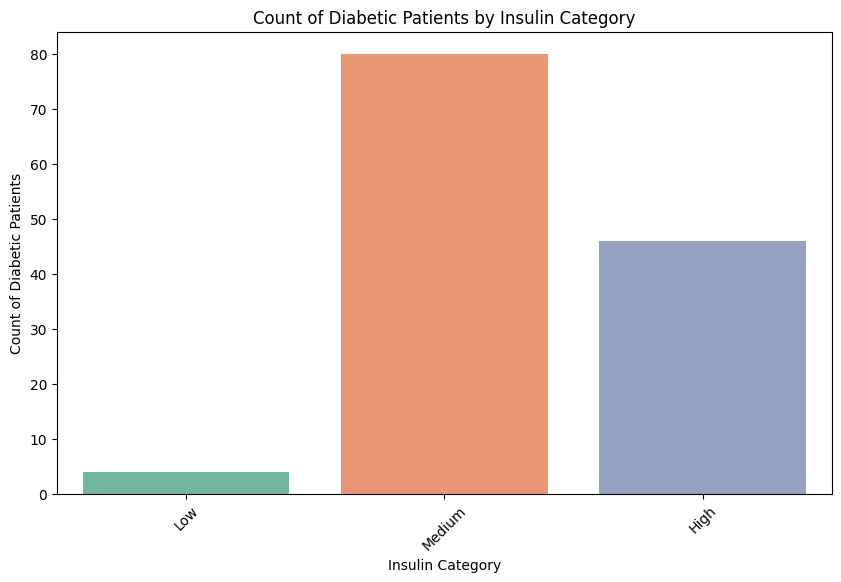

In [33]:
insulin_bins = [0, 50, 200, 10000]
insulin_labels = ['Low', 'Medium', 'High']

# Create a new column 'InsulinCategory' based on the custom bins and labels
df['InsulinCategory'] = pd.cut(df['Insulin'], bins=insulin_bins, labels=insulin_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'InsulinCategory' as the x-axis
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='InsulinCategory', order=insulin_labels, palette="Set2")
plt.xlabel('Insulin Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Insulin Category')
plt.xticks(rotation=45)
plt.show()


## Define the custom bins and labels for 'Glucose'

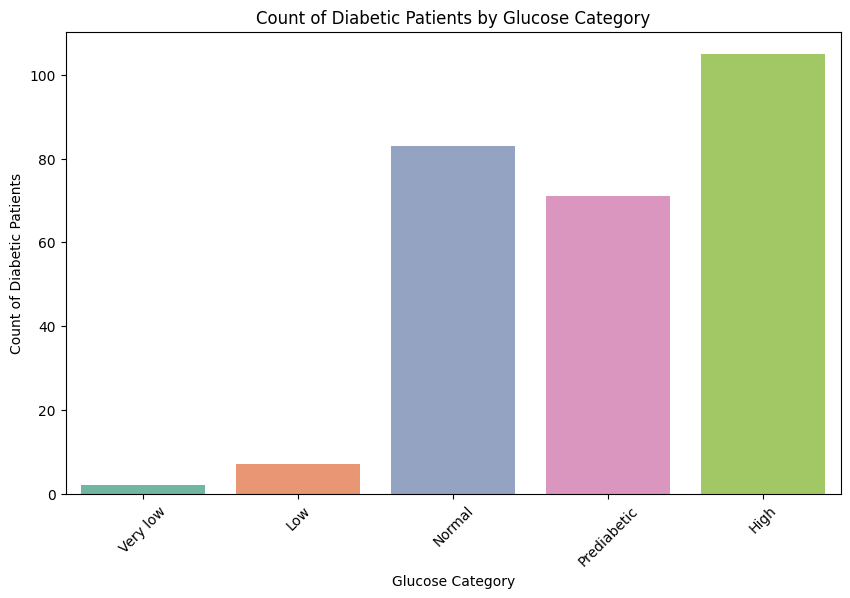

In [34]:
glucose_bins = [0, 75, 90, 125, 150, 1000]  # Adjust the boundaries as needed
glucose_labels = ['Very low', 'Low', 'Normal', 'Prediabetic', 'High']

# Create a new column 'GlucoseCategory' based on the custom bins and labels
df['GlucoseCategory'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'GlucoseCategory' as the x-axis
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='GlucoseCategory', order=glucose_labels, palette="Set2")
plt.xlabel('Glucose Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Glucose Category')
plt.xticks(rotation=45)
plt.show()


# <font color=red>Data Wrangling:</font>

# <font color=navy>**Seprate Independent Variable(X) and Dependent Variable(y)**</font>

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PregnanciesGroup',
       'AgeGroup', 'BloodPressureCategory', 'SkinThicknessCategory',
       'BMICategory', 'InsulinCategory', 'GlucoseCategory'],
      dtype='object')

In [36]:
#Independent Variables
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#Target variable
y = df['Outcome']

In [37]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# <font color=red>Split the data into training and testing sets</font>

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# Feature Scaling

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-0.86394553,  0.06032628,  0.23252153, ..., -0.59426762,
        -1.10316947, -0.27704152],
       [-0.86394553, -0.86888624,  0.79598761, ...,  0.43404704,
        -0.71238555,  0.84376203],
       [-1.16313479, -0.90092805, -0.04921151, ...,  1.64802962,
        -0.37742791, -1.05298243],
       ...,
       [ 0.03362225,  0.09236809, -0.04921151, ..., -0.43716399,
         1.96433735,  1.01619334],
       [-0.26556701, -0.19600821,  0.23252153, ..., -0.80849984,
        -1.08260189, -0.79433546],
       [ 0.03362225, -0.38825908, -0.33094455, ..., -0.00869955,
        -0.01308802, -0.36325717]])

# Train a Modal

### SVM:

In [42]:
sv_model = SVC(C= 0.1,kernel='linear',random_state=15)
sv_model.fit(X_train,y_train)

#Prediction on Traing Data
sv_pred_train = sv_model.predict(X_train)
#Prediction on Test Data
sv_pred_test = sv_model.predict(X_test)


#Evaluation
SVM_Train_Accuracy = accuracy_score(y_train,sv_pred_train)*100
SVM_Test_Accuracy = accuracy_score(y_test,sv_pred_test)*100
SVM_CV = cross_val_score(sv_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {SVM_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {SVM_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {SVM_CV:.2f}%")

Train Accuracy: 76.55%
Test Accuracy: 76.62%
cross Validataion Score: 74.69%


### LogisticRegression

In [43]:
logistic = LogisticRegression(C=100,penalty='l1',solver='liblinear',random_state=16)
logistic.fit(X_train,y_train)


#Prediction on Traing Data
log_pred_train = logistic.predict(X_train)
#Prediction on Test Data
log_pred_test = logistic.predict(X_test)


log_Train_Accuracy = accuracy_score(y_train,log_pred_train)*100
log_Test_Accuracy = accuracy_score(y_test,log_pred_test)*100
Log_CV = cross_val_score(logistic,X_test,y_test,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {log_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {log_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {Log_CV:.2f}%")


Train Accuracy: 77.20%
Test Accuracy: 77.27%
cross Validataion Score: 75.94%


# <font color="red">Conclusion</font>
After evaluating the performance metrics of the models, specifically Support Vector Machine and Logistic Regression, and keeping in mind the objective of maximizing the accuracy in predicting Diabetic Patients, the **Logistic Regression** model stands out as the most suitable choice.

As a result, we recommend using Logistic Regression for predicting Diabetic Patients based on the available data and the assessed evaluation metrics.